In [8]:
!pip install findspark

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [5]:
import findspark
findspark.init("/Applications/spark/")


import pyspark
from pyspark import SparkContext

In [12]:
#from pyspark import SparkContext
#sc = SparkContext(master = "local")
#sc
#hata verdi

In [6]:
sc = SparkContext.getOrCreate();

sc

<SparkContext master=local[*] appName=pyspark-shell>

In [7]:
sc.version

'3.0.0'

In [32]:
sc.sparkUser()

'htccel'

In [33]:
sc.appName

'pyspark-shell'

In [34]:
dir(sc)

['PACKAGE_EXTENSIONS',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_accumulatorServer',
 '_active_spark_context',
 '_batchSize',
 '_callsite',
 '_checkpointFile',
 '_conf',
 '_dictToJavaMap',
 '_do_init',
 '_encryption_enabled',
 '_ensure_initialized',
 '_gateway',
 '_getJavaStorageLevel',
 '_initialize_context',
 '_javaAccumulator',
 '_jsc',
 '_jvm',
 '_lock',
 '_next_accum_id',
 '_pickled_broadcast_vars',
 '_python_includes',
 '_repr_html_',
 '_serialize_to_jvm',
 '_temp_dir',
 '_unbatched_serializer',
 'accumulator',
 'addFile',
 'addPyFile',
 'appName',
 'applicationId',
 'binaryFiles',
 'binaryRecords',
 'broadcas

In [35]:
sc.stop()

In [8]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
from pyspark import SparkContext



spark=SparkSession.builder \
    .master("local") \
    .appName("pyspark_uygulama") \
    .getOrCreate()
    #.config()


sc = spark.sparkContext
sc 
    
#sc = spark.sparkContext(master="local")
#sc



<SparkContext master=local[*] appName=pyspark-shell>

In [9]:
spark_df=spark.read.csv("churn.csv", header=True, inferSchema= True)

In [10]:
spark_df.printSchema()

root
 |-- RowNumber: integer (nullable = true)
 |-- CustomerId: integer (nullable = true)
 |-- Surname: string (nullable = true)
 |-- CreditScore: integer (nullable = true)
 |-- Geography: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Tenure: integer (nullable = true)
 |-- Balance: double (nullable = true)
 |-- NumOfProducts: integer (nullable = true)
 |-- HasCrCard: integer (nullable = true)
 |-- IsActiveMember: integer (nullable = true)
 |-- EstimatedSalary: double (nullable = true)
 |-- Exited: integer (nullable = true)



In [42]:
type(spark_df)

pyspark.sql.dataframe.DataFrame

In [43]:
spark_df.cache()

DataFrame[RowNumber: int, CustomerId: int, Surname: string, CreditScore: int, Geography: string, Gender: string, Age: int, Tenure: int, Balance: double, NumOfProducts: int, HasCrCard: int, IsActiveMember: int, EstimatedSalary: double, Exited: int]

In [44]:
type(spark_df)

pyspark.sql.dataframe.DataFrame

In [45]:
spark_df.head()

Row(RowNumber=1, CustomerId=15634602, Surname='Hargrave', CreditScore=619, Geography='France', Gender='Female', Age=42, Tenure=2, Balance=0.0, NumOfProducts=1, HasCrCard=1, IsActiveMember=1, EstimatedSalary=101348.88, Exited=1)

In [46]:
spark_df.dtypes

[('RowNumber', 'int'),
 ('CustomerId', 'int'),
 ('Surname', 'string'),
 ('CreditScore', 'int'),
 ('Geography', 'string'),
 ('Gender', 'string'),
 ('Age', 'int'),
 ('Tenure', 'int'),
 ('Balance', 'double'),
 ('NumOfProducts', 'int'),
 ('HasCrCard', 'int'),
 ('IsActiveMember', 'int'),
 ('EstimatedSalary', 'double'),
 ('Exited', 'int')]

In [47]:
spark_df.show(2)

+---------+----------+--------+-----------+---------+------+---+------+--------+-------------+---------+--------------+---------------+------+
|RowNumber|CustomerId| Surname|CreditScore|Geography|Gender|Age|Tenure| Balance|NumOfProducts|HasCrCard|IsActiveMember|EstimatedSalary|Exited|
+---------+----------+--------+-----------+---------+------+---+------+--------+-------------+---------+--------------+---------------+------+
|        1|  15634602|Hargrave|        619|   France|Female| 42|     2|     0.0|            1|        1|             1|      101348.88|     1|
|        2|  15647311|    Hill|        608|    Spain|Female| 41|     1|83807.86|            1|        0|             1|      112542.58|     0|
+---------+----------+--------+-----------+---------+------+---+------+--------+-------------+---------+--------------+---------------+------+
only showing top 2 rows



In [48]:
spark_df.count()

10000

In [49]:
len(spark_df.columns)

14

In [50]:
spark_df.describe().show()

+-------+------------------+-----------------+-------+-----------------+---------+------+------------------+------------------+-----------------+------------------+-------------------+-------------------+-----------------+-------------------+
|summary|         RowNumber|       CustomerId|Surname|      CreditScore|Geography|Gender|               Age|            Tenure|          Balance|     NumOfProducts|          HasCrCard|     IsActiveMember|  EstimatedSalary|             Exited|
+-------+------------------+-----------------+-------+-----------------+---------+------+------------------+------------------+-----------------+------------------+-------------------+-------------------+-----------------+-------------------+
|  count|             10000|            10000|  10000|            10000|    10000| 10000|             10000|             10000|            10000|             10000|              10000|              10000|            10000|              10000|
|   mean|            5000.5|

In [51]:
spark_df.describe("Tenure").show()

+-------+------------------+
|summary|            Tenure|
+-------+------------------+
|  count|             10000|
|   mean|            5.0128|
| stddev|2.8921743770496837|
|    min|                 0|
|    max|                10|
+-------+------------------+



In [52]:
spark_df.select("CreditScore","Balance").show(5)

+-----------+---------+
|CreditScore|  Balance|
+-----------+---------+
|        619|      0.0|
|        608| 83807.86|
|        502| 159660.8|
|        699|      0.0|
|        850|125510.82|
+-----------+---------+
only showing top 5 rows



In [53]:
spark_df.select("NumOfProducts").distinct().count()

4

In [54]:
spark_df.select("Balance").dropDuplicates().count()


6382

In [55]:
spark_df.select("Balance").count()

10000

In [56]:
spark_df.crosstab("NumOfProducts","Exited").show()

+--------------------+----+----+
|NumOfProducts_Exited|   0|   1|
+--------------------+----+----+
|                   2|4242| 348|
|                   4|   0|  60|
|                   1|3675|1409|
|                   3|  46| 220|
+--------------------+----+----+



In [57]:
#gozlem secme

In [58]:
spark_df.filter(spark_df.Age >40).count()

3581

In [59]:
spark_df.groupby("Exited").agg({"Balance": "mean"}).show()

+------+-----------------+
|Exited|     avg(Balance)|
+------+-----------------+
|     1|91108.53933726063|
|     0|72745.29677885193|
+------+-----------------+



In [60]:
a = spark_df.groupby("Exited").count().toPandas()
a.head()

,Exited,count
0,1,2037
1,0,7963


# veri isleme

In [12]:
spark_df.dropna()

DataFrame[RowNumber: int, CustomerId: int, Surname: string, CreditScore: int, Geography: string, Gender: string, Age: int, Tenure: int, Balance: double, NumOfProducts: int, HasCrCard: int, IsActiveMember: int, EstimatedSalary: double, Exited: int]

In [62]:
#spark_df["NewAgPro"]=spark_df["Age"]*spark_df["NumOfProducts"]*spark_df["Tenure"]

#df["NewAGT"] = df["Age"] - df["Tenure"]
#df["NewAGTPro"] = df["NewAGT"] * df["NumOfProducts"]

In [41]:
spark_df=spark_df.withColumn("NewAGT",(spark_df.Age)-spark_df.Tenure)

In [58]:
spark_df=spark_df.withColumn("NewAgPro",(spark_df.Age)*(spark_df.Tenure)*(spark_df.NumOfProducts))

In [59]:
spark_df=spark_df.withColumn("NewAGTPro",(spark_df.NewAGT)*(spark_df.NumOfProducts))

In [13]:
sdf = spark_df.toPandas()
sdf.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#yeni degisken ====spark_df.withColumn("yeni_degisken", spark_df.BMI / 2).select("BMI","yeni_degisken").show(5)

In [ ]:
#degisken isim degistirme ====spark_df.withColumnRenamed("Outcome","bagimli_degisken").columns

In [14]:
# Veri Görselleştirme

import matplotlib.pyplot as plt
import seaborn as sns

In [16]:


#sns.barplot(x = "Exited", y = spark_df.Exited.index, data = spark_df)
#calismaz,pandas yazilisi

In [107]:
sdf = spark_df.toPandas()
sdf.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,NewAGT,NewAGTPro,NewAgPro
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,40,40,84
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,40,40,41
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,34,102,1008
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,38,76,78
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,41,41,86


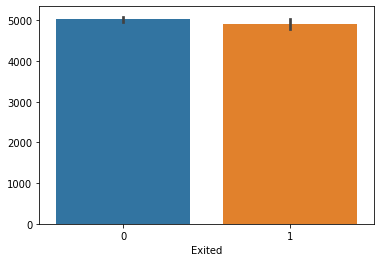

In [108]:
sns.barplot(x = "Exited", y = sdf.Exited.index, data = sdf)

# makine ogrenmesi

In [124]:
spark_df.dtypes

[('RowNumber', 'int'),
 ('CustomerId', 'int'),
 ('Surname', 'string'),
 ('CreditScore', 'int'),
 ('Geography', 'string'),
 ('Gender', 'string'),
 ('Age', 'int'),
 ('Tenure', 'int'),
 ('Balance', 'double'),
 ('NumOfProducts', 'int'),
 ('HasCrCard', 'int'),
 ('IsActiveMember', 'int'),
 ('EstimatedSalary', 'double'),
 ('Exited', 'int'),
 ('NewAGT', 'int'),
 ('NewAGTPro', 'int'),
 ('NewAgPro', 'int')]

In [9]:
#label integer olmadiginda string indexer ile donusum yapiyoruz
#from pyspark.ml.feature import StringIndexer

#stringIndexer = StringIndexer(inputCol = "exited", outputCol = "label")
#indexed = formula.fit(spark_df).transform(spark_df)
#spark_df = indexed.withColumn("label", indexed["label"].cast("integer"))

In [17]:
from pyspark.ml.feature import VectorAssembler

In [18]:
spark_df.columns

['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [60]:
bag = ["CustomerId","Tenure", "Balance","EstimatedSalary","Age","NewAgPro","NewAGTPro","CreditScore","NewAGT"]

In [61]:
vectorAssembler = VectorAssembler(inputCols = bag, outputCol = "features")

In [62]:
va_df = vectorAssembler.transform(spark_df)

In [63]:
va_df=va_df.withColumnRenamed("Exited", "label")




In [64]:
final_df = va_df.select(["features","label"])



In [65]:
final_df.show()



+--------------------+-----+
|            features|label|
+--------------------+-----+
|[1.5634602E7,2.0,...|    1|
|[1.5647311E7,1.0,...|    0|
|[1.5619304E7,8.0,...|    1|
|[1.5701354E7,1.0,...|    0|
|[1.5737888E7,2.0,...|    0|
|[1.5574012E7,8.0,...|    1|
|[1.5592531E7,7.0,...|    0|
|[1.5656148E7,4.0,...|    1|
|[1.5792365E7,4.0,...|    0|
|[1.5592389E7,2.0,...|    0|
|[1.5767821E7,6.0,...|    0|
|[1.5737173E7,3.0,...|    0|
|[1.5632264E7,10.0...|    0|
|[1.5691483E7,5.0,...|    0|
|[1.5600882E7,7.0,...|    0|
|[1.5643966E7,3.0,...|    0|
|[1.5737452E7,1.0,...|    1|
|[1.5788218E7,9.0,...|    0|
|[1.5661507E7,6.0,...|    0|
|[1.5568982E7,6.0,...|    0|
+--------------------+-----+
only showing top 20 rows



In [66]:
splits = final_df.randomSplit([0.7,0.3])
train_df = splits[0]
test_df = splits[1]

In [67]:
train_df

DataFrame[features: vector, label: int]

In [68]:
test_df

DataFrame[features: vector, label: int]

# GBM ile modelleme

In [69]:
from pyspark.ml.classification import GBTClassifier

In [70]:
gbm = GBTClassifier(maxIter = 10, featuresCol = "features", labelCol = "label")

In [71]:
gbm_model = gbm.fit(train_df)

In [72]:
#tahmin. predict yerine transform kullanilir pysparkda
y_pred = gbm_model.transform(test_df)

In [73]:
y_pred.show(10)

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[1.5565706E7,1.0,...|    1|[0.74884064866950...|[0.81722839523295...|       0.0|
|[1.5565878E7,3.0,...|    0|[1.26595092334420...|[0.92634821632901...|       0.0|
|[1.5565879E7,9.0,...|    0|[1.15842391020327...|[0.91026278939670...|       0.0|
|[1.5565891E7,8.0,...|    0|[1.20764334179475...|[0.91798558652113...|       0.0|
|[1.5565996E7,8.0,...|    0|[0.93038962521071...|[0.86538775017536...|       0.0|
|[1.556603E7,5.0,8...|    1|[0.64659617999728...|[0.78468703907054...|       0.0|
|[1.5566211E7,1.0,...|    1|[0.83251384448791...|[0.84091175652900...|       0.0|
|[1.5566253E7,9.0,...|    1|[-0.0953904058744...|[0.45244893724346...|       1.0|
|[1.5566312E7,5.0,...|    1|[-0.9282676186055...|[0.13510740963514...|       1.0|
|[1.556666E7,10.

In [74]:
# acuracy skora bakarak degerlendirilir. Label ve prediction cekilir
ac = y_pred.select("label","prediction")

In [75]:
#acuracy icinden labelin predictina esit olanlarini say. acuracye bol. dogru tahmin edilenleri(0=0,1=1) say toplam degere bol
ac.filter(ac.label == ac.prediction).count() / ac.count()

0.8310425745893396

# model tuning

In [80]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

evaluator = BinaryClassificationEvaluator()

paramGrid = (ParamGridBuilder()
             .addGrid(gbm.maxDepth, [2, 4, 6])
             .addGrid(gbm.maxBins, [20, 30])
             .addGrid(gbm.maxIter, [10, 20])
             .build())

cv = CrossValidator(estimator= gbm, estimatorParamMaps = paramGrid, evaluator=evaluator, numFolds= 10)
#estimator(tahminci), estimatorParamMaps(parametre gridi),evaluator(hata degerlendirme metrigi), numfolds(10 katli cross validation)

In [82]:
cv_model = cv.fit(train_df)

In [83]:
y_pred = cv_model.transform(test_df)
ac = y_pred.select("label","prediction")

In [84]:
ac.filter(ac.label == ac.prediction).count() / ac.count()

0.8280254777070064

In [85]:
evaluator.evaluate(y_pred)

0.8207756379836659

In [86]:
from pyspark.ml.classification import LogisticRegression
loj = LogisticRegression(featuresCol = "features", labelCol = 'label', maxIter=10)
loj_model = loj.fit(train_df)
y_pred = loj_model.transform(test_df)
ac = y_pred.select("label", "prediction")
ac.filter(ac.label == ac.prediction).count() / ac.count()

0.7854508883674154

In [87]:
from pyspark.ml.classification import LogisticRegression
loj = LogisticRegression(featuresCol = "features", labelCol = 'label', maxIter=10)
loj_model = loj.fit(train_df)
y_pred = loj_model.transform(test_df)
ac = y_pred.select("label", "prediction")
ac.filter(ac.label == ac.prediction).count() / ac.count()

0.7854508883674154

In [88]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label')
rf_model = rf.fit(train_df)
y_pred = rf_model.transform(test_df)
ac = y_pred.select("label", "prediction")
ac.filter(ac.label == ac.prediction).count() / ac.count()

0.8327187395239691